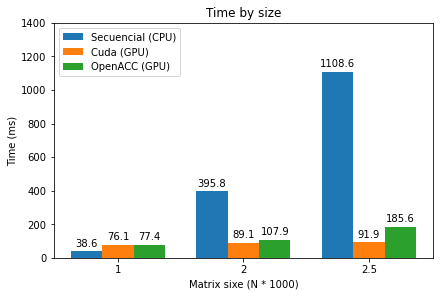

In [25]:
import matplotlib.pyplot as plt
import numpy as np

sizes = ("1", "2", "2.5")
times = {
    'Secuencial (CPU)': (38.6, 395.8, 1108.6),
    'Cuda (GPU)': (76.1, 89.1, 91.9),
    'OpenACC (GPU)': (77.4, 107.9, 185.6),
}

x = np.arange(len(sizes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Matrix sixe (N * 1000)')
ax.set_title('Time by size')
ax.set_xticks(x + width, sizes)
ax.legend(loc='upper left')
ax.set_ylim(0, 1400)

plt.show()